# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [43]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 2 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_2 = sum(xi ** 4 for xi in xs)  # coeficiente del parámetro 2
    c_1 = sum(xi ** 3 for xi in xs)  # coeficiente del parámetro 1
    c_0 = sum(xi ** 2 for xi in xs)  # coeficiente del parámetro 0
    c_ind = sum(xi ** 2 * yi for xi, yi in zip(xs, ys))  # término independiente

    return (c_2, c_1, c_0, c_ind)


def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    c_2 = sum(xi ** 3 for xi in xs)  # coeficiente del parámetro 2
    c_1 = sum(xi ** 2 for xi in xs)  # coeficiente del parámetro 1
    c_0 = sum(xi for xi in xs)       # coeficiente del parámetro 0
    c_ind = sum(xi * yi for xi, yi in zip(xs, ys))  # término independiente

    return (c_2, c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_2 = sum(xi ** 2 for xi in xs)  # coeficiente del parámetro 2
    c_1 = sum(xi for xi in xs)       # coeficiente del parámetro 1
    c_0 = len(xs)                    # coeficiente del parámetro 0
    c_ind = sum(yi for yi in ys)     # término independiente

    return (c_2, c_1, c_0, c_ind)


# Conjunto de datos de ejemplo

In [37]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

In [38]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[01-11 12:30:35][INFO] Se ajustarán 2 parámetros.
[01-11 12:30:35][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


[01-11 12:30:47][INFO] Se ajustarán 2 parámetros.
[01-11 12:30:47][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


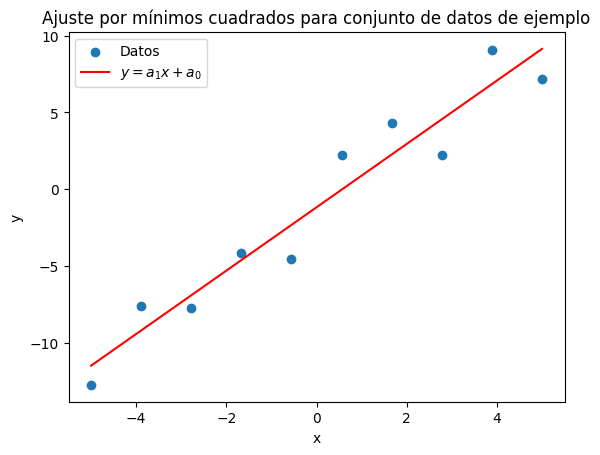

In [39]:
import numpy as np
import matplotlib.pyplot as plt

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

x = np.linspace(-5, 5, 100)

y = [m * xi + b for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

## Conjunto de datos 1

In [44]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

In [45]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_0, der_parcial_1, der_parcial_2])

[01-11 12:33:54][INFO] Se ajustarán 3 parámetros.
[01-11 12:33:54][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-11 12:33:54][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]


[01-11 12:38:12][INFO] Se ajustarán 3 parámetros.
[01-11 12:38:12][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-11 12:38:12][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
a2 (coeficiente cuadrático): 2.024410482925083
a1 (coeficiente lineal): -1.123325129575543
a0 (término independiente): -0.6382556172537739


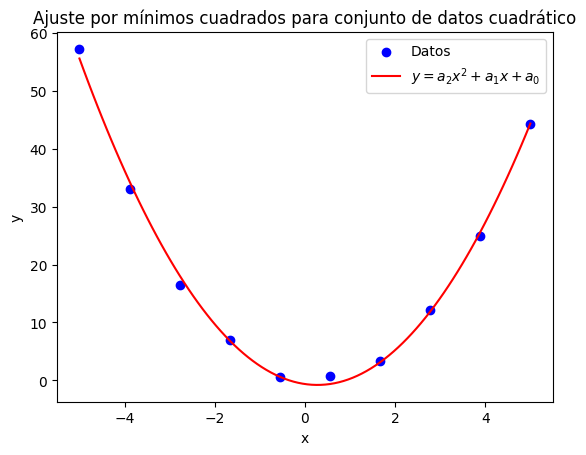

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Ajustar el modelo cuadrático
a2, a1, a0 = ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_0, der_parcial_1, der_parcial_2])

# Generar puntos para la gráfica
x = np.linspace(min(xs1), max(xs1), 100)

# Calcular valores de y utilizando el modelo cuadrático
y = [a2 * xi**2 + a1 * xi + a0 for xi in x]

# Imprimir los valores de a2, a1 y a0
print(f"a2 (coeficiente cuadrático): {a2}")
print(f"a1 (coeficiente lineal): {a1}")
print(f"a0 (término independiente): {a0}")

# Graficar
plt.scatter(xs1, ys1, label="Datos", color="blue")
plt.plot(x, y, color="red", label=r"$ y = a_2 x^2 + a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos cuadrático")
plt.legend()
plt.show()


Interpole el conjunto de datos 1 usando la función cuadrática. 

## Conjunto de datos 2

In [72]:
import math

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """
    Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro b
    para el modelo transformado ln(y) = ln(a) + b * x, al reemplazar los valores ``xs`` y ``ys``.
    La ecuación es de la forma:
    
        c_1 * b + c_0 * ln(a) = c_ind

    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro b.

    ``c_0``: coeficiente del parámetro ln(a).

    ``c_ind``: coeficiente del término independiente.

    """
    # Aplicar logaritmo natural a los valores de y
    ln_ys = [math.log(y) for y in ys]

    # coeficiente del término independiente
    c_ind = sum(x * ln_y for x, ln_y in zip(xs, ln_ys))

    # coeficiente del parámetro b
    c_1 = sum(x ** 2 for x in xs)

    # coeficiente del parámetro ln(a)
    c_0 = sum(xs)

    return (c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """
    Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro ln(a)
    para el modelo transformado ln(y) = ln(a) + b * x, al reemplazar los valores ``xs`` y ``ys``.
    La ecuación es de la forma:

        c_1 * b + c_0 * ln(a) = c_ind

    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro b.

    ``c_0``: coeficiente del parámetro ln(a).

    ``c_ind``: coeficiente del término independiente.

    """
    # Aplicar logaritmo natural a los valores de y
    ln_ys = [math.log(y) for y in ys]

    # coeficiente del término independiente
    c_ind = sum(ln_ys)

    # coeficiente del parámetro b
    c_1 = sum(xs)

    # coeficiente del parámetro ln(a)
    c_0 = len(xs)

    return (c_1, c_0, c_ind)

In [70]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

In [73]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_0, der_parcial_1])

[01-11 13:09:57][INFO] Se ajustarán 2 parámetros.
[01-11 13:09:57][INFO] 
[[22.0372     20.         19.05727035]
 [ 0.         -9.57184451  5.82589171]]


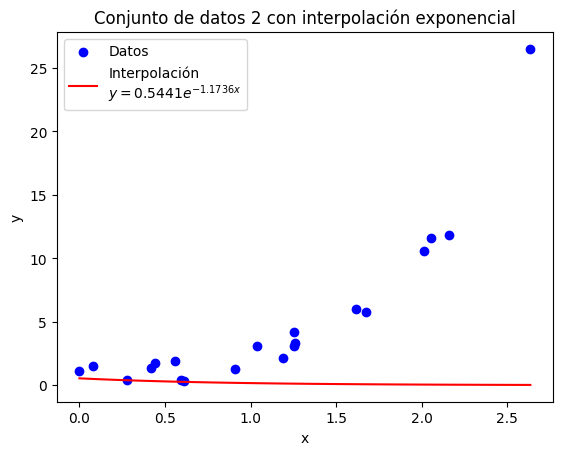

In [77]:
# Generar puntos para la interpolación
x_vals = np.linspace(min(xs2), max(xs2), 100)
y_vals = a * np.exp(b * x_vals)

# Graficar los datos y la curva ajustada
plt.scatter(xs2, ys2, label="Datos", color="blue")
plt.plot(x_vals, y_vals, label=f"Interpolación\n$y = {a:.4f} e^{{{b:.4f}x}}$", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2 con interpolación exponencial")
plt.legend()
plt.show()



Interpole el conjunto de datos 2 usando la función exponencial. 